In [11]:
import torch
import torch.nn as nn
from d2l import torch as d2l

In [12]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

def get_dataloader_workers():
    # 设定读取的线程数
    """
    可以利用下面程序测试时间，以选择最佳的线程数去读取。
    timer = d2l.Timer()
    for X, y in train_iter:
        pass
    f'{timer.stop():.2f} sec'
    """
    return 4


def Fashion_MNIST_Loader(batch_size, resize=None, download=False):
    trans = [transforms.ToTensor()]
    if resize is not None:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(root="../data",
                                                    train=True,
                                                    transform=trans,
                                                    download=download)
    mnist_test = torchvision.datasets.FashionMNIST(root="../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=download)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_dataloader_workers()),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_dataloader_workers()))

<torch.utils.data.dataloader.DataLoader object at 0x00000197ABC72648> <torch.utils.data.dataloader.DataLoader object at 0x00000197800B2408>


KeyboardInterrupt: 

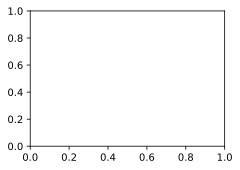

In [13]:
AlexNet = nn.Sequential(nn.Conv2d(1, 96, kernel_size=11, stride=4), nn.ReLU(),
                        nn.MaxPool2d(kernel_size=3, stride=2),
                        nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
                        nn.MaxPool2d(kernel_size=3, stride=2),
                        nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
                        nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
                        nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
                        nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
                        nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
                        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),
                        nn.Linear(4096, 10))

batch_size, lr, num_epoch = 128, 0.05, 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(AlexNet.parameters(), 0.05)
# mnist_train, mnist_test = d2l.load_data_fashion_mnist(batch_size)
mnist_train, mnist_test = Fashion_MNIST_Loader(batch_size, resize=224)
print(mnist_train, mnist_test)
d2l.train_ch3(AlexNet, mnist_train, mnist_test, loss_fn, 5, optimizer)